In [1]:
import os
import glob

import DESutils
import GPRutils
import vK2KGPR
import plotGPR
import vK2KGPR
import vonkarmanFT as vk

import numpy as np
import astropy.units as u
import astropy.table as tb
from astropy.time import Time
import matplotlib.pyplot as plt
plt.style.use('~/GitHub/custom-matplotlib/custom.mplstyle')
import astropy.stats as stats
from scipy.signal import savgol_filter

from IPython import embed
from importlib import reload
import warnings
warnings.filterwarnings("ignore")

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
FITSfiles = sorted(glob.glob(f"/home/fortino/GPRSolutions/zone134/GPR.??????.?RC.fits"))
FITSfiles += sorted(glob.glob(f"/home/fortino/GPRSolutions/zone133/GPR.??????.?RC.fits"))
FITSfiles += sorted(glob.glob(f"/home/fortino/GPRSolutions/zone132/GPR.??????.?RC.fits"))
FITSfiles += sorted(glob.glob(f"/home/fortino/GPRSolutions/eris/GPR.??????.?RC.fits"))
print(len(FITSfiles))

343


In [ ]:
%%time
AP = plotGPR.AggregatePlots(FITSfiles)
AP.calcVals()

In [11]:
# for band in plotGPR.DES_PASSBANDS:
# #     assert band in DES_PASSBANDS
# #     if len(self.expNums[band]) == 0:
# #         return
    
#     plt.hist(
#         AP.RMS_raw[band],
#         bins=50, range=(0, 25),
# #         histtype="step",
#         color=plotGPR.DES_COLORS[band],
#         label=f"{band}")

# plt.legend()
# plt.show()

# for band in plotGPR.DES_PASSBANDS:
# #     assert band in DES_PASSBANDS
# #     if len(self.expNums[band]) == 0:
# #         return
    
#     plt.hist(
#         AP.RMS_GPR[band],
#         bins=50, range=(0, 25),
# #         histtype="step",
#         color=plotGPR.DES_COLORS[band],
#         label=f"{band}")

# plt.legend()
# plt.show()

for band in plotGPR.DES_PASSBANDS:
    
    # If there are no exposures for that band in AP, then skip it.
    if len(AP.expNums[band]) == 0:
        continue
    
    densities = u.Quantity(AP.starDensity[band]).value
    plt.hist(densities, color=plotGPR.DES_COLORS[band], label=band)
    
plt.legend()
plt.show()

In [3]:
times = np.array([])
GPtimes = np.array([])
nOpt1 = np.array([])
nOpt2 = np.array([])
nGP = np.array([])
for outfile in outfiles:
    parseOut = DESutils.parseOutfile(outfile)
    if parseOut.finished:
        times = np.append(times, parseOut.totalTime.value)
        GPtimes = np.append(GPtimes, parseOut.avgGPTime.value)
        nOpt1 = np.append(nOpt1, parseOut.nOpt1)
        nOpt2 = np.append(nOpt2, parseOut.nOpt2)
        nGP = np.append(nGP, parseOut.nGP)
    else:
        if parseOut.LinAlgErr:
            print(outfile)
            print(parseOut.LinAlgErr_params)

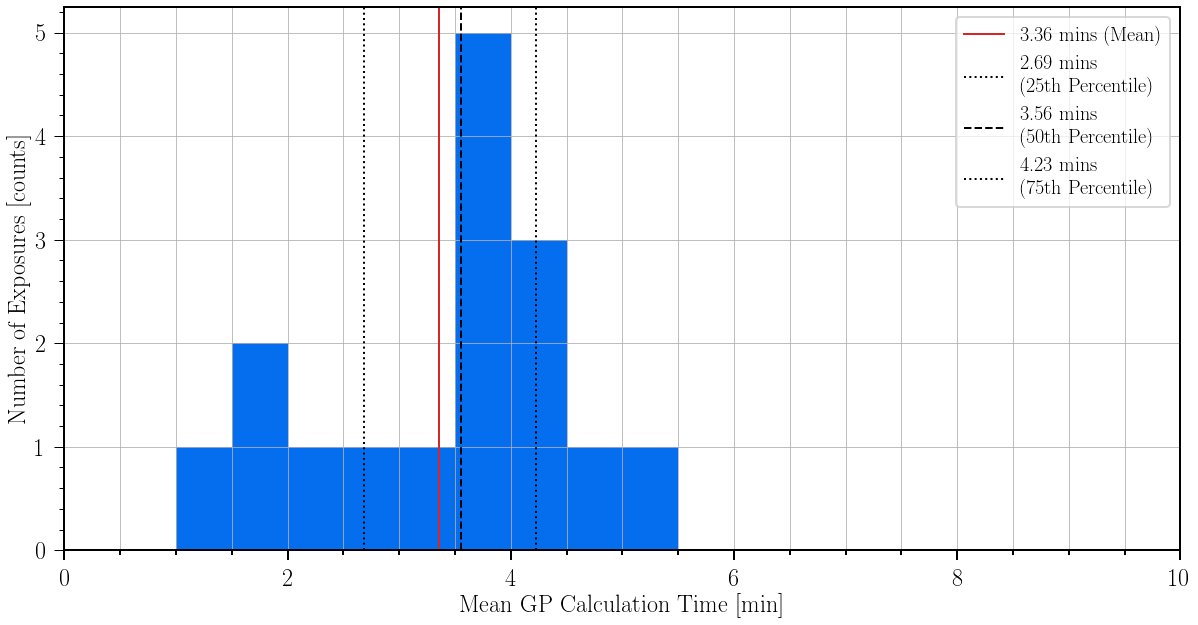

In [4]:
plt.figure(figsize=(20, 10))
plt.hist(GPtimes, bins=20, range=(0, 10))

percs = np.percentile(GPtimes, (25, 50, 75))
plt.axvline(x=np.mean(GPtimes), c="tab:red", linewidth=2, ls="-", label=f"{np.round(np.mean(GPtimes), 2)} mins (Mean)")
plt.axvline(x=percs[0], c="black", linewidth=2, ls=":", label=f"{np.round(percs[0], 2)} mins \n(25th Percentile)")
plt.axvline(x=percs[1], c="black", linewidth=2, ls="--", label=f"{np.round(percs[1], 2)} mins \n(50th Percentile)")
plt.axvline(x=percs[2], c="black", linewidth=2, ls=":", label=f"{np.round(percs[2], 2)} mins \n(75th Percentile)")
plt.legend(loc="upper right", framealpha=0.75)

plt.xlim((0, 10))
plt.ylim((0, None))

plt.xlabel("Mean GP Calculation Time [min]")
plt.ylabel("Number of Exposures [counts]")

plt.grid(which="minor", axis="x")
plt.grid()

plt.show()

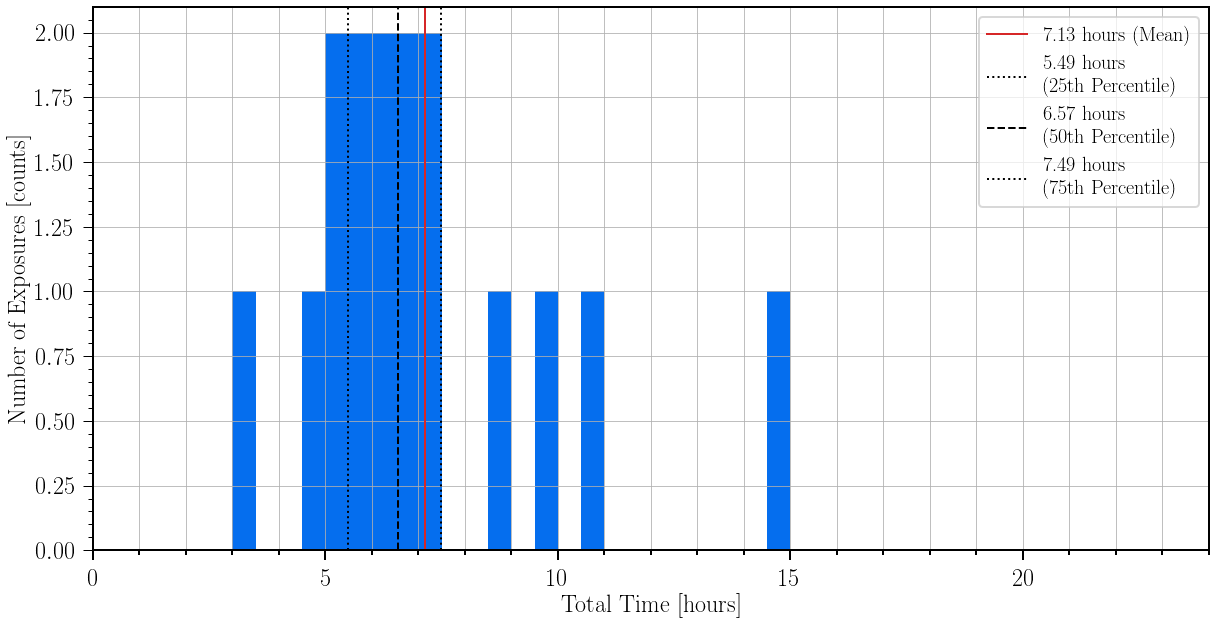

In [5]:
plt.figure(figsize=(20, 10))
plt.hist(times, bins=80, range=(0, 40))

percs = np.percentile(times, (25, 50, 75))
plt.axvline(x=np.mean(times), c="tab:red", linewidth=2, ls="-", label=f"{np.round(np.mean(times), 2)} hours (Mean)")
plt.axvline(x=percs[0], c="black", linewidth=2, ls=":", label=f"{np.round(percs[0], 2)} hours \n(25th Percentile)")
plt.axvline(x=percs[1], c="black", linewidth=2, ls="--", label=f"{np.round(percs[1], 2)} hours \n(50th Percentile)")
plt.axvline(x=percs[2], c="black", linewidth=2, ls=":", label=f"{np.round(percs[2], 2)} hours \n(75th Percentile)")
plt.legend(loc="upper right", framealpha=0.75)

plt.xlim((0, 24))
plt.ylim((0, None))

plt.xlabel("Total Time [hours]")
plt.ylabel("Number of Exposures [counts]")

plt.grid(which="minor", axis="x")
plt.grid()

plt.show()

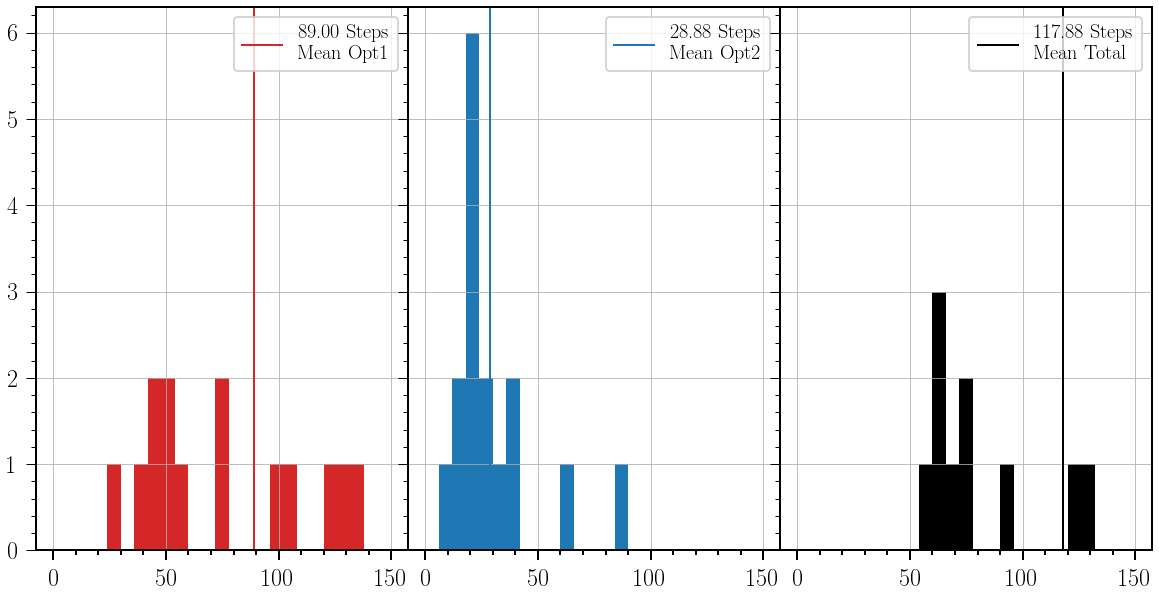

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(20, 10))
fig.subplots_adjust(wspace=0)

histrange = (0, 150)
nBins = 25

axes[0].axvline(x=np.mean(nOpt1), c="tab:red", linewidth=2, ls="-", label=f"{np.mean(nOpt1):.2f} Steps\nMean Opt1")
axes[0].hist(nOpt1, color="tab:red", histtype="stepfilled", range=histrange, bins=nBins)
axes[0].legend(loc="upper right")
axes[0].grid()

axes[1].axvline(x=np.mean(nOpt2), c="tab:blue", linewidth=2, ls="-", label=f"{np.mean(nOpt2):.2f} Steps\nMean Opt2")
axes[1].hist(nOpt2, color="tab:blue", histtype="stepfilled", range=histrange, bins=nBins)
axes[1].legend(loc="upper right")
axes[1].grid()

axes[2].axvline(x=np.mean(nOpt1+nOpt2), c="black", linewidth=2, ls="-", label=f"{np.mean(nOpt1+nOpt2):.2f} Steps\nMean Total")
axes[2].hist(nOpt1+nOpt2, color="black", histtype="stepfilled", range=histrange, bins=nBins)
axes[2].legend(loc="upper right")
axes[2].grid()
        

plt.show()